In [60]:
import json
import os
import ipywidgets as widgets
from IPython.display import clear_output, display

class NHLDataParser:
    def __init__(self, nhl_games_file_path, season=None, stage='regular'):
        self.season = season
        self.stage = stage
        self.game_type = {'regular': 2, 'playoff': 3}

        if os.path.isdir(nhl_games_file_path):
            json_file_path = os.path.join(nhl_games_file_path, 'all_games_data.json')
        else:
            json_file_path = nhl_games_file_path

        with open(json_file_path, 'r') as file:
            self.games_data = json.load(file)

        self.filtered_games = self.filter_games_by_season_and_stage()

    def filter_games_by_season_and_stage(self):
        filtered = {}
        for game_id, game_data in self.games_data.items():
            if (self.season is None or game_data['season'] == int(self.season)) and game_data['gameType'] == self.game_type[self.stage]:
                filtered[game_id] = game_data
        return filtered

    def get_game_ids(self):
        return list(self.filtered_games.keys())

    def get_events(self, game_id):
        return self.filtered_games[game_id]['plays'] if game_id in self.filtered_games else []

# Initialisation du parser
nhl_games_file_path = 'C:\\Users\\Admin\\Documents\\IFT6758-A3\\IFT-6758---A3-NHL\\nhl_data'
parser = NHLDataParser(nhl_games_file_path, season='20162017', stage='regular')

# Widget pour sélectionner un game_id
game_ids = parser.get_game_ids()
game_id_slider = widgets.IntSlider(
    value=int(game_ids[0]),
    min=int(game_ids[0]),
    max=int(game_ids[-1]),
    step=1,
    description='Game ID:',
    continuous_update=False
)

# Widget pour sélectionner un événement dans un match
event_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=0,
    step=1,
    description='Event:',
    continuous_update=False
)

# Fonction de mise à jour du slider d'événements lorsque l'utilisateur change de `game_id`
def update_event_slider(*args):
    game_id = str(game_id_slider.value)
    events = parser.get_events(game_id)
    event_slider.max = len(events) - 1 if events else 0

# Associer la fonction au changement de valeur du `game_id`
game_id_slider.observe(update_event_slider, 'value')

# Créer un conteneur pour les sliders
vbox = widgets.VBox([game_id_slider, event_slider])
display(vbox)

# Fonction pour afficher l'événement sélectionné
def display_event(game_id, event_idx):
    clear_output(wait=True)  # Effacer l'affichage précédent
    display(vbox)  # Réafficher les sliders

    events = parser.get_events(str(game_id))
    if events and 0 <= event_idx < len(events):
        event = events[event_idx]
        print(f"Game ID: {game_id}, Event {event_idx + 1}:")
        print(f"  Event ID: {event.get('eventId', 'N/A')}")
        print(f"  Period: {event.get('periodDescriptor', {}).get('number', 'N/A')}")
        print(f"  Time in Period: {event.get('timeInPeriod', 'N/A')}")
        print(f"  Event Type: {event.get('typeDescKey', 'N/A')}")
        print(f"  Event Owner Team ID: {event.get('details', {}).get('eventOwnerTeamId', 'N/A')}")
        print(f"  X Coord: {event.get('details', {}).get('xCoord', 'N/A')}, Y Coord: {event.get('details', {}).get('yCoord', 'N/A')}")
    else:
        print("No event data available for this game or invalid event index.")

# Afficher l'événement sélectionné à chaque changement du `event_slider`
def on_event_change(change):
    display_event(game_id_slider.value, event_slider.value)

event_slider.observe(on_event_change, 'value')

# Appeler initialement pour mettre à jour les événements du premier game_id
update_event_slider()


Game ID: 2016020002, Event 35:
  Event ID: 66
  Period: 1
  Time in Period: 05:12
  Event Type: hit
  Event Owner Team ID: 19
  X Coord: -91, Y Coord: -37


In [ ]:
import json
import os
import ipywidgets as widgets
from IPython.display import clear_output, display

class NHLDataParser:
    def __init__(self, nhl_games_file_path, season=None, stage='regular'):
        self.season = season
        self.stage = stage
        self.game_type = {'regular': 2, 'playoff': 3}

        if os.path.isdir(nhl_games_file_path):
            json_file_path = os.path.join(nhl_games_file_path, 'all_games_data.json')
        else:
            json_file_path = nhl_games_file_path

        with open(json_file_path, 'r') as file:
            self.games_data = json.load(file)

        self.filtered_games = self.filter_games_by_season_and_stage()

    def filter_games_by_season_and_stage(self):
        filtered = {}
        for game_id, game_data in self.games_data.items():
            if (self.season is None or game_data['season'] == int(self.season)) and game_data['gameType'] == self.game_type[self.stage]:
                filtered[game_id] = game_data
        return filtered

    def get_game_ids(self):
        return list(self.filtered_games.keys())

    def get_events(self, game_id):
        return self.filtered_games[game_id]['plays'] if game_id in self.filtered_games else []

    def get_game_info(self, game_id):
        """
        Retourne le Game ID, les équipes et le score final du match.
        """
        game_data = self.filtered_games.get(game_id)
        if not game_data:
            return "Données du match indisponibles"
        
        home_team = game_data['homeTeam']['name']['default']
        away_team = game_data['awayTeam']['name']['default']
        home_score = game_data['homeTeam']['score']
        away_score = game_data['awayTeam']['score']
        game_starting_Time = game_data['startTimeUTC']

        return widgets.HTML(
        value=f"""
        <p><b>Game Starting Time:</b> {game_starting_Time}</p>
        <p><b>Game ID:</b> {game_id}</p>
        <p><b>{home_team}</b> (home) vs <b>{away_team}</b> (away)</p>
        <p><b>Score:</b> {away_score}-{home_score}</p>
        """
    )



# Initialisation du parser
nhl_games_file_path = 'C:\\Users\\Admin\\Documents\\IFT6758-A3\\IFT-6758---A3-NHL\\nhl_data'
parser = NHLDataParser(nhl_games_file_path, season='20162017', stage='regular')

# Widget pour sélectionner un game_id
game_ids = parser.get_game_ids()
game_id_slider = widgets.IntSlider(
    value=int(game_ids[0]),
    min=int(game_ids[0]),
    max=int(game_ids[-1]),
    step=1,
    description='Game ID:',
    continuous_update=False
)

# Widget pour sélectionner un événement dans un match
event_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=0,
    step=1,
    description='Event:',
    continuous_update=False
)

# Widget pour afficher les informations du match (Game ID, équipes et score)
game_info_label = widgets.Label()

# Widget pour afficher les informations de l'événement
event_info_label = widgets.Label()

# Fonction de mise à jour du slider d'événements lorsque l'utilisateur change de `game_id`
def update_event_slider(*args):
    game_id = str(game_id_slider.value)
    events = parser.get_events(game_id)
    event_slider.max = len(events) - 1 if events else 0

    # Mettre à jour les informations du match
    game_info_label.value = parser.get_game_info(game_id)

# Associer la fonction au changement de valeur du `game_id`
game_id_slider.observe(update_event_slider, 'value')

# Fonction pour afficher l'événement sélectionné
def display_event(game_id, event_idx):
    clear_output(wait=True)  # Effacer l'affichage précédent
    display(vbox)  # Réafficher les widgets

    events = parser.get_events(str(game_id))
    if events and 0 <= event_idx < len(events):
        event = events[event_idx]
        event_info_label.value = (
            f"Time in Period: {event.get('timeInPeriod', 'N/A')} | "
            f"Event ID: {event.get('eventId', 'N/A')} | "
            f"Event Type: {event.get('typeDescKey', 'N/A')} | "
            f"Coordinates: ({event.get('details', {}).get('xCoord', 'N/A')}, {event.get('details', {}).get('yCoord', 'N/A')})"
        )
    else:
        event_info_label.value = "No event data available for this game or invalid event index."

# Afficher l'événement sélectionné à chaque changement du `event_slider`
def on_event_change(change):
    display_event(game_id_slider.value, event_slider.value)

event_slider.observe(on_event_change, 'value')

# Créer un conteneur pour les sliders et les informations
vbox = widgets.VBox([game_id_slider, game_info_label, event_slider, event_info_label])
display(vbox)

# Appeler initialement pour mettre à jour les événements du premier game_id
update_event_slider()


In [70]:
import json
import os
import ipywidgets as widgets
from IPython.display import clear_output, display

class NHLDataParser:
    def __init__(self, nhl_games_file_path, season=None, stage='regular'):
        self.season = season
        self.stage = stage
        self.game_type = {'regular': 2, 'playoff': 3}

        if os.path.isdir(nhl_games_file_path):
            json_file_path = os.path.join(nhl_games_file_path, 'all_games_data.json')
        else:
            json_file_path = nhl_games_file_path

        with open(json_file_path, 'r') as file:
            self.games_data = json.load(file)

        self.filtered_games = self.filter_games_by_season_and_stage()

    def filter_games_by_season_and_stage(self):
        filtered = {}
        for game_id, game_data in self.games_data.items():
            if (self.season is None or game_data['season'] == int(self.season)) and game_data['gameType'] == self.game_type[self.stage]:
                filtered[game_id] = game_data
        return filtered

    def get_game_ids(self):
        return list(self.filtered_games.keys())

    def get_events(self, game_id):
        return self.filtered_games[game_id]['plays'] if game_id in self.filtered_games else []

    def get_game_info(self, game_id):
        """
        Retourne le Game ID, les équipes et le score final du match.
        """
        game_data = self.filtered_games.get(game_id)
        if not game_data:
            return widgets.HTML("Données du match indisponibles")
        
        home_team = game_data['homeTeam']['name']['default']
        away_team = game_data['awayTeam']['name']['default']
        home_score = game_data['homeTeam']['score']
        away_score = game_data['awayTeam']['score']
        game_starting_time = game_data['startTimeUTC']

        # Tirs au but et tirs de fusillade (si disponibles)
        home_sog = game_data['homeTeam']['sog']
        away_sog = game_data['awayTeam']['sog']
        #home_so_goals = game_data['homeTeam'].get('shootoutGoals', 'None')
       # away_so_goals = game_data['awayTeam'].get('shootoutGoals', 'None')
        #home_so_attempts = game_data['homeTeam'].get('shootoutAttempts', 'None')
        #away_so_attempts = game_data['awayTeam'].get('shootoutAttempts', 'None')

        

        # Formatage des informations en utilisant un tableau HTML
        formatted_info = f"""
        <p><b>{game_starting_time}</b></p>
        <p><b>Game ID: {game_id}; {home_team} (home) vs {away_team} (away)</b></p>
        <p><b>{game_data['periodDescriptor']['periodType']}</b></p>
        <table style="width:50%; text-align: left; border-collapse: collapse;">
           <tr>
               <th></th>
               <th style="text-align: center;">Home</th>
               <th style="text-align: center;">Away</th>
           </tr>
           <tr>
               <td><b>Teams:</b></td>
               <td style="text-align: center;">{home_team}</td>
               <td style="text-align: center;">{away_team}</td>
           </tr>
           <tr>
               <td><b>Goals:</b></td>
               <td style="text-align: center;">{home_score}</td>
               <td style="text-align: center;">{away_score}</td>
           </tr>
           <tr>
               <td><b>SoG:</b></td>
               <td style="text-align: center;">{home_sog}</td>
               <td style="text-align: center;">{away_sog}</td>
           </tr>
        
       </table>
       """

        return widgets.HTML(value=formatted_info)


# Initialisation du parser
nhl_games_file_path = 'C:\\Users\\Admin\\Documents\\IFT6758-A3\\IFT-6758---A3-NHL\\nhl_data'
parser = NHLDataParser(nhl_games_file_path, season='20162017', stage='regular')

# Widget pour sélectionner un game_id
game_ids = parser.get_game_ids()
game_id_slider = widgets.IntSlider(
    value=int(game_ids[0]),
    min=int(game_ids[0]),
    max=int(game_ids[-1]),
    step=1,
    description='Game ID:',
    continuous_update=False
)

# Widget pour sélectionner un événement dans un match
event_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=0,
    step=1,
    description='Event:',
    continuous_update=False
)

# Widget pour afficher les informations du match (Game ID, équipes et score)
game_info_label = widgets.Output()

# Widget pour afficher les informations de l'événement
event_info_label = widgets.Label()

# Fonction de mise à jour du slider d'événements lorsque l'utilisateur change de `game_id`
def update_event_slider(*args):
    game_id = str(game_id_slider.value)
    events = parser.get_events(game_id)
    event_slider.max = len(events) - 1 if events else 0

    # Mettre à jour les informations du match
    with game_info_label:
        game_info_label.clear_output()  # Efface l'affichage précédent
        display(parser.get_game_info(game_id))  # Affiche le widget HTML

# Associer la fonction au changement de valeur du `game_id`
game_id_slider.observe(update_event_slider, 'value')

# Fonction pour afficher l'événement sélectionné
def display_event(game_id, event_idx):
    clear_output(wait=True)  # Effacer l'affichage précédent
    display(vbox)  # Réafficher les widgets

    events = parser.get_events(str(game_id))
    if events and 0 <= event_idx < len(events):
        event = events[event_idx]
        event_info_label.value = (
            f"Time in Period: {event.get('timeInPeriod', 'N/A')} | "
            f"Event ID: {event.get('eventId', 'N/A')} | "
            f"Event Type: {event.get('typeDescKey', 'N/A')} | "
            f"Coordinates: ({event.get('details', {}).get('xCoord', 'N/A')}, {event.get('details', {}).get('yCoord', 'N/A')})"
        )
    else:
        event_info_label.value = "No event data available for this game or invalid event index."

# Afficher l'événement sélectionné à chaque changement du `event_slider`
def on_event_change(change):
    display_event(game_id_slider.value, event_slider.value)

event_slider.observe(on_event_change, 'value')

# Créer un conteneur pour les sliders et les informations
vbox = widgets.VBox([game_id_slider, game_info_label, event_slider, event_info_label])
display(vbox)

# Appeler initialement pour mettre à jour les événements du premier game_id
update_event_slider()


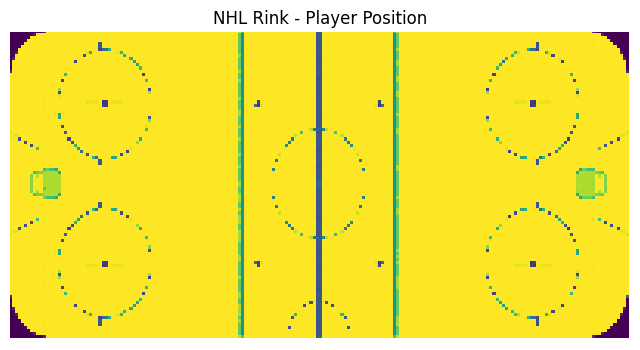

In [78]:
import json
import os
import ipywidgets as widgets
from IPython.display import clear_output, display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np

class NHLDataParser:
    def __init__(self, nhl_games_file_path, season=None, stage='regular'):
        self.season = season
        self.stage = stage
        self.game_type = {'regular': 2, 'playoff': 3}

        if os.path.isdir(nhl_games_file_path):
            json_file_path = os.path.join(nhl_games_file_path, 'all_games_data.json')
        else:
            json_file_path = nhl_games_file_path

        with open(json_file_path, 'r') as file:
            self.games_data = json.load(file)

        self.filtered_games = self.filter_games_by_season_and_stage()

    def filter_games_by_season_and_stage(self):
        filtered = {}
        for game_id, game_data in self.games_data.items():
            if (self.season is None or game_data['season'] == int(self.season)) and game_data['gameType'] == self.game_type[self.stage]:
                filtered[game_id] = game_data
        return filtered

    def get_game_ids(self):
        return list(self.filtered_games.keys())

    def get_events(self, game_id):
        return self.filtered_games[game_id]['plays'] if game_id in self.filtered_games else []

    def get_game_info(self, game_id):
        """
        Retourne le Game ID, les équipes et le score final du match.
        """
        game_data = self.filtered_games.get(game_id)
        if not game_data:
            return widgets.HTML("Données du match indisponibles")
        
        home_team = game_data['homeTeam']['name']['default']
        away_team = game_data['awayTeam']['name']['default']
        home_score = game_data['homeTeam']['score']
        away_score = game_data['awayTeam']['score']
        game_starting_time = game_data['startTimeUTC']
        home_sog = game_data['homeTeam']['sog']
        away_sog = game_data['awayTeam']['sog']

        # Formatage des informations en utilisant un tableau HTML
        formatted_info = f"""
        <p><b>{game_starting_time}</b></p>
        <p><b>Game ID: {game_id}; {home_team} (home) vs {away_team} (away)</b></p>
        <p><b>{game_data['periodDescriptor']['periodType']}</b></p>
        <table style="width:50%; text-align: left; border-collapse: collapse;">
           <tr>
               <th></th>
               <th style="text-align: center;">Home</th>
               <th style="text-align: center;">Away</th>
           </tr>
           <tr>
               <td><b>Teams:</b></td>
               <td style="text-align: center;">{home_team}</td>
               <td style="text-align: center;">{away_team}</td>
           </tr>
           <tr>
               <td><b>Goals:</b></td>
               <td style="text-align: center;">{home_score}</td>
               <td style="text-align: center;">{away_score}</td>
           </tr>
           <tr>
               <td><b>SoG:</b></td>
               <td style="text-align: center;">{home_sog}</td>
               <td style="text-align: center;">{away_sog}</td>
           </tr>
       </table>
       """

        return widgets.HTML(value=formatted_info)

    def get_event_coordinates(self, event):
        """Retourne les coordonnées x et y d'un événement."""
        return event.get('details', {}).get('xCoord'), event.get('details', {}).get('yCoord')


# Fonction pour afficher le terrain de la NHL avec la position d'un joueur


def show_rink_with_player_position(x, y):
    img = Image.open('C:\\Users\\Admin\\Documents\\IFT6758-A3\\IFT-6758---A3-NHL\\figures\\nhl_rink.PNG')
    img = img.resize((200, 100))  # Ajustez les dimensions selon l'échelle souhaitée
    img = np.array(img)  # Convertir en tableau numpy

    plt.figure(figsize=(8, 4))
    plt.imshow(img, aspect='auto')  # Ne pas déformer l'image

    # Calculer les coordonnées avec le facteur de mise à l'échelle
    scale_x = 2  # Facteur d'échelle pour x
    scale_y = 2  # Facteur d'échelle pour y
    x_mapped = x * scale_x
    y_mapped = y * scale_y

    plt.scatter(x_mapped, y_mapped, color='blue', s=100)  # Placer le point bleu
    plt.xlim(0, 200)  # Limites selon la taille de l'image
    plt.ylim(100, 0)  # Inverser pour que l'origine soit en haut à gauche
    plt.title("NHL Rink - Player Position")
    plt.axis('off')   # Ne pas afficher les axes
    plt.show()

def show_rink_with_event_point(event_data):
    # Load the rink image
    rink_image = mpimg.imread('C:\\Users\\Admin\\Documents\\IFT6758-A3\\IFT-6758---A3-NHL\\figures\\nhl_rink.PNG')  # Replace with the actual path

    # Extract event coordinates
    x_coord = event_data.get('details', {}).get('xCoord')
    y_coord = event_data.get('details', {}).get('yCoord')

    # Create the figure and plot the image
    plt.figure(figsize=(10, 5))  # Adjust figure size as needed
    plt.imshow(rink_image, extent=[-100, 100, -42.5, 42.5])  # Set image extent based on rink dimensions

    # Plot the event point
    plt.scatter(x_coord, y_coord, color='blue', s=100, label=f"Event ID: {event_data['eventId']}")

    # Set plot labels and limits
    plt.xlabel('Feet')
    plt.ylabel('Feet')
    plt.title('NHL Rink with Event')
    plt.xlim(-100, 100)
    plt.ylim(-42.5, 42.5)

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()

# Initialisation du parser
nhl_games_file_path = 'C:\\Users\\Admin\\Documents\\IFT6758-A3\\IFT-6758---A3-NHL\\nhl_data'
parser = NHLDataParser(nhl_games_file_path, season='20162017', stage='regular')

# Widget pour sélectionner un game_id
game_ids = parser.get_game_ids()
game_id_slider = widgets.IntSlider(
    value=int(game_ids[0]),
    min=int(game_ids[0]),
    max=int(game_ids[-1]),
    step=1,
    description='Game ID:',
    continuous_update=False
)

# Widget pour sélectionner un événement dans un match
event_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=0,
    step=1,
    description='Event:',
    continuous_update=False
)

# Widget pour afficher les informations du match (Game ID, équipes et score)
game_info_label = widgets.Output()

# Widget pour afficher les informations de l'événement
event_info_label = widgets.Label()

# Fonction de mise à jour du slider d'événements lorsque l'utilisateur change de `game_id`
def update_event_slider(*args):
    game_id = str(game_id_slider.value)
    events = parser.get_events(game_id)
    event_slider.max = len(events) - 1 if events else 0

    # Mettre à jour les informations du match
    with game_info_label:
        game_info_label.clear_output()  # Efface l'affichage précédent
        display(parser.get_game_info(game_id))  # Affiche le widget HTML

# Associer la fonction au changement de valeur du `game_id`
game_id_slider.observe(update_event_slider, 'value')

# Fonction pour afficher l'événement sélectionné
def display_event(game_id, event_idx):
    clear_output(wait=True)  # Effacer l'affichage précédent
    display(vbox)  # Réafficher les widgets

    events = parser.get_events(str(game_id))
    if events and 0 <= event_idx < len(events):
        event = events[event_idx]
        event_info_label.value = (
            f"Time in Period: {event.get('timeInPeriod', 'N/A')} | "
            f"Event ID: {event.get('eventId', 'N/A')} | "
            f"Event Type: {event.get('typeDescKey', 'N/A')} | "
            f"Coordinates: ({event.get('details', {}).get('xCoord', 'N/A')}, {event.get('details', {}).get('yCoord', 'N/A')})"
        )

        # Afficher l'image du terrain avec le point bleu
        x_coord, y_coord = parser.get_event_coordinates(event)
        if x_coord is not None and y_coord is not None:
            show_rink_with_player_position(x_coord, y_coord)
    else:
        event_info_label.value = "No event data available for this game or invalid event index."

# Afficher l'événement sélectionné à chaque changement du `event_slider`
def on_event_change(change):
    display_event(game_id_slider.value, event_slider.value)

event_slider.observe(on_event_change, 'value')

# Créer un conteneur pour les sliders et les informations
vbox = widgets.VBox([game_id_slider, game_info_label, event_slider, event_info_label])
display(vbox)

# Appeler initialement pour mettre à jour les événements du premier game_id
update_event_slider()


In [ ]:
import json
import os
import base64
from IPython.display import HTML, display
import ipywidgets as widgets
import matplotlib.pyplot as plt

class NHLDataParser:
    def __init__(self, nhl_games_file_path, season=None, stage='regular'):
        self.season = season
        self.stage = stage
        self.game_type = {'regular': 2, 'playoff': 3}

        if os.path.isdir(nhl_games_file_path):
            json_file_path = os.path.join(nhl_games_file_path, 'all_games_data.json')
        else:
            json_file_path = nhl_games_file_path

        with open(json_file_path, 'r') as file:
            self.games_data = json.load(file)

        self.filtered_games = self.filter_games_by_season_and_stage()

    def filter_games_by_season_and_stage(self):
        filtered = {}
        for game_id, game_data in self.games_data.items():
            if (self.season is None or game_data['season'] == int(self.season)) and game_data['gameType'] == self.game_type[self.stage]:
                filtered[game_id] = game_data
        return filtered

    def get_game_ids(self):
        return list(self.filtered_games.keys())

    def get_events(self, game_id):
        return self.filtered_games[game_id]['plays'] if game_id in self.filtered_games else []

    def get_game_info(self, game_id):
        game_data = self.filtered_games.get(game_id)
        if not game_data:
            return widgets.HTML("Données du match indisponibles")
        
        home_team = game_data['homeTeam']['name']['default']
        away_team = game_data['awayTeam']['name']['default']
        home_score = game_data['homeTeam']['score']
        away_score = game_data['awayTeam']['score']
        game_starting_time = game_data['startTimeUTC']
        home_sog = game_data['homeTeam']['sog']
        away_sog = game_data['awayTeam']['sog']

        formatted_info = f"""
        <p><b>{game_starting_time}</b></p>
        <p><b>Game ID: {game_id}; {home_team} (home) vs {away_team} (away)</b></p>
        <p><b>{game_data['periodDescriptor']['periodType']}</b></p>
        <table style="width:50%; text-align: left; border-collapse: collapse;">
           <tr>
               <th></th>
               <th style="text-align: center;">Home</th>
               <th style="text-align: center;">Away</th>
           </tr>
           <tr>
               <td><b>Teams:</b></td>
               <td style="text-align: center;">{home_team}</td>
               <td style="text-align: center;">{away_team}</td>
           </tr>
           <tr>
               <td><b>Goals:</b></td>
               <td style="text-align: center;">{home_score}</td>
               <td style="text-align: center;">{away_score}</td>
           </tr>
           <tr>
               <td><b>SoG:</b></td>
               <td style="text-align: center;">{home_sog}</td>
               <td style="text-align: center;">{away_sog}</td>
           </tr>
       </table>
       """

        return widgets.HTML(value=formatted_info)

    def get_event_coordinates(self, event):
        """Retourne les coordonnées x et y d'un événement."""
        return event.get('details', {}).get('xCoord'), event.get('details', {}).get('yCoord')


# Fonction pour afficher le terrain de la NHL avec la position d'un joueur sous forme de HTML

def show_rink_with_player_position_html(x, y, rink_path='C:\\Users\\Admin\\Documents\\IFT6758-A3\\IFT-6758---A3-NHL\\figures\\nhl_rink.PNG'):
    # Charger l'image de la patinoire
    with open(rink_path, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read()).decode('utf-8')

    # Dimensions de l'image et de la patinoire
    img_width = 1000  # Vous pouvez ajuster la taille pour l'affichage
    img_height = 425  # Ajusté en fonction de l'échelle de la patinoire

    # Dimensions réelles de la patinoire (en pieds)
    rink_width = 200
    rink_height = 85

    # Facteurs de mise à l'échelle (en pixels par pied)
    scale_x = img_width / rink_width
    scale_y = img_height / rink_height

    # Ajustement des coordonnées pour l'affichage (l'axe Y doit être inversé)
    x_mapped = x * scale_x
    y_mapped = (rink_height / 2 - y) * scale_y  # Inversion de l'axe Y pour que le centre soit à 0

    # Création du HTML avec l'image et un point bleu positionné selon les coordonnées
    html_content = f'''
    <div style="position: relative; width: {img_width}px; height: {img_height}px;">
        <img src="data:image/png;base64,{encoded_string}" style="width: 100%; height: auto;"/>
        <div style="
            position: absolute;
            top: {y_mapped}px;
            left: {x_mapped}px;
            width: 10px;
            height: 10px;
            background-color: blue;
            border-radius: 50%;
        "></div>
    </div>
    '''

    # Afficher le HTML
    display(HTML(html_content))


# Fonction pour afficher un événement sélectionné

def display_event(game_id, event_idx):
    clear_output(wait=True)  # Effacer l'affichage précédent
    display(vbox)  # Réafficher les widgets

    events = parser.get_events(str(game_id))
    if events and 0 <= event_idx < len(events):
        event = events[event_idx]
        event_info_label.value = (
            f"Time in Period: {event.get('timeInPeriod', 'N/A')} | "
            f"Event ID: {event.get('eventId', 'N/A')} | "
            f"Event Type: {event.get('typeDescKey', 'N/A')} | "
            f"Coordinates: ({event.get('details', {}).get('xCoord', 'N/A')}, {event.get('details', {}).get('yCoord', 'N/A')})"
        )

        # Afficher l'image du terrain avec le point bleu
        x_coord, y_coord = parser.get_event_coordinates(event)
        if x_coord is not None and y_coord is not None:
            show_rink_with_player_position_html(x_coord, y_coord)
    else:
        event_info_label.value = "No event data available for this game or invalid event index."


# Initialisation du parser
nhl_games_file_path = 'C:\\Users\\Admin\\Documents\\IFT6758-A3\\IFT-6758---A3-NHL\\nhl_data'
parser = NHLDataParser(nhl_games_file_path, season='20162017', stage='regular')

# Widget pour sélectionner un game_id
game_ids = parser.get_game_ids()
game_id_slider = widgets.IntSlider(
    value=int(game_ids[0]),
    min=int(game_ids[0]),
    max=int(game_ids[-1]),
    step=1,
    description='Game ID:',
    continuous_update=False
)

# Widget pour sélectionner un événement dans un match
event_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=0,
    step=1,
    description='Event:',
    continuous_update=False
)

# Widget pour afficher les informations du match (Game ID, équipes et score)
game_info_label = widgets.Output()

# Widget pour afficher les informations de l'événement
event_info_label = widgets.Label()

# Fonction de mise à jour du slider d'événements lorsque l'utilisateur change de `game_id`
def update_event_slider(*args):
    game_id = str(game_id_slider.value)
    events = parser.get_events(game_id)
    event_slider.max = len(events) - 1 if events else 0

    # Mettre à jour les informations du match
    with game_info_label:
        game_info_label.clear_output()  # Efface l'affichage précédent
        display(parser.get_game_info(game_id))  # Affiche le widget HTML

# Associer la fonction au changement de valeur du `game_id`
game_id_slider.observe(update_event_slider, 'value')

# Afficher l'événement sélectionné à chaque changement du `event_slider`
def on_event_change(change):
    display_event(game_id_slider.value, event_slider.value)

event_slider.observe(on_event_change, 'value')

# Créer un conteneur pour les sliders et les informations
vbox = widgets.VBox([game_id_slider, game_info_label, event_slider, event_info_label])
display(vbox)

# Appeler initialement pour mettre à jour les événements du premier game_id
update_event_slider()



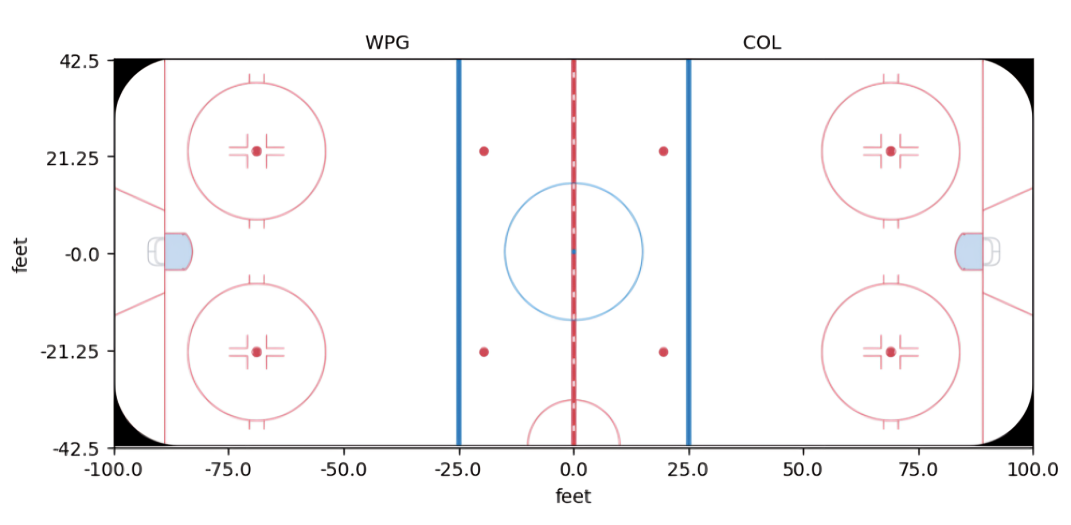

In [96]:
import json
import os
import base64
from IPython.display import HTML, display, clear_output
import ipywidgets as widgets
import matplotlib.pyplot as plt

class NHLDataParser:
    def __init__(self, nhl_games_file_path, season=None, stage='regular'):
        self.season = season
        self.stage = stage
        self.game_type = {'regular': 2, 'playoff': 3}

        if os.path.isdir(nhl_games_file_path):
            json_file_path = os.path.join(nhl_games_file_path, 'all_games_data.json')
        else:
            json_file_path = nhl_games_file_path

        with open(json_file_path, 'r') as file:
            self.games_data = json.load(file)

        self.filtered_games = self.filter_games_by_season_and_stage()

    def filter_games_by_season_and_stage(self):
        filtered = {}
        for game_id, game_data in self.games_data.items():
            if (self.season is None or game_data['season'] == int(self.season)) and game_data['gameType'] == self.game_type[self.stage]:
                filtered[game_id] = game_data
        return filtered

    def get_game_ids(self):
        return list(self.filtered_games.keys())

    def get_events(self, game_id):
        return self.filtered_games[game_id]['plays'] if game_id in self.filtered_games else []

    def get_game_info(self, game_id):
        game_data = self.filtered_games.get(game_id)
        if not game_data:
            return widgets.HTML("Données du match indisponibles")
        
        home_team = game_data['homeTeam']['name']['default']
        away_team = game_data['awayTeam']['name']['default']
        home_score = game_data['homeTeam']['score']
        away_score = game_data['awayTeam']['score']
        game_starting_time = game_data['startTimeUTC']
        home_sog = game_data['homeTeam']['sog']
        away_sog = game_data['awayTeam']['sog']

        formatted_info = f"""
        <p><b>{game_starting_time}</b></p>
        <p><b>Game ID: {game_id}; {home_team} (home) vs {away_team} (away)</b></p>
        <p><b>{game_data['periodDescriptor']['periodType']}</b></p>
        <table style="width:50%; text-align: left; border-collapse: collapse;">
           <tr>
               <th></th>
               <th style="text-align: center;">Home</th>
               <th style="text-align: center;">Away</th>
           </tr>
           <tr>
               <td><b>Teams:</b></td>
               <td style="text-align: center;">{home_team}</td>
               <td style="text-align: center;">{away_team}</td>
           </tr>
           <tr>
               <td><b>Goals:</b></td>
               <td style="text-align: center;">{home_score}</td>
               <td style="text-align: center;">{away_score}</td>
           </tr>
           <tr>
               <td><b>SoG:</b></td>
               <td style="text-align: center;">{home_sog}</td>
               <td style="text-align: center;">{away_sog}</td>
           </tr>
       </table>
       """

        return widgets.HTML(value=formatted_info)

    def get_event_coordinates(self, event):
        """Retourne les coordonnées x et y d'un événement."""
        return event.get('details', {}).get('xCoord'), event.get('details', {}).get('yCoord')


# Fonction pour afficher le terrain de la NHL avec la position d'un joueur sous forme de HTML

def show_rink_with_player_position_html(x, y, rink_path='C:\\Users\\Admin\\Documents\\IFT6758-A3\\IFT-6758---A3-NHL\\notebooks\\NHL_image.PNG'):
    # Charger l'image de la patinoire
    with open(rink_path, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read()).decode('utf-8')

    # Dimensions de l'image et de la patinoire (réduction de moitié de l'image)
    img_width = 500  # Moitié de la taille précédente
    img_height = 212.5  # Moitié de la hauteur précédente

    # Dimensions réelles de la patinoire (en pieds)
    rink_width = 200
    rink_height = 85

    # Facteurs de mise à l'échelle (en pixels par pied)
    scale_x = img_width / rink_width
    scale_y = img_height / rink_height

    # Ajustement des coordonnées pour l'affichage (centre de l'image = (0,0))
    x_mapped = (x + rink_width / 2) * scale_x
    y_mapped = (rink_height / 2 - y) * scale_y  # Inversion de l'axe Y

    # Création du HTML avec l'image et un point bleu positionné selon les coordonnées
    html_content = f'''
    <div style="position: relative; width: {img_width}px; height: {img_height}px;">
        <img src="data:image/png;base64,{encoded_string}" style="width: 100%; height: auto;"/>
        <div style="
            position: absolute;
            top: {y_mapped}px;
            left: {x_mapped}px;
            width: 10px;
            height: 10px;
            background-color: blue;
            border-radius: 50%;
        "></div>
    </div>
    '''

    # Afficher le HTML
    display(HTML(html_content))


# Fonction pour afficher un événement sélectionné

def display_event(game_id, event_idx):
    clear_output(wait=True)  # Effacer l'affichage précédent
    display(vbox)  # Réafficher les widgets

    events = parser.get_events(str(game_id))
    if events and 0 <= event_idx < len(events):
        event = events[event_idx]
        event_info_label.value = (
            f"Time in Period: {event.get('timeInPeriod', 'N/A')} | "
            f"Event ID: {event.get('eventId', 'N/A')} | "
            f"Event Type: {event.get('typeDescKey', 'N/A')} | "
            f"Coordinates: ({event.get('details', {}).get('xCoord', 'N/A')}, {event.get('details', {}).get('yCoord', 'N/A')})"
        )

        # Afficher l'image du terrain avec le point bleu
        x_coord, y_coord = parser.get_event_coordinates(event)
        if x_coord is not None and y_coord is not None:
            show_rink_with_player_position_html(x_coord, y_coord)
    else:
        event_info_label.value = "No event data available for this game or invalid event index."


# Initialisation du parser
nhl_games_file_path = 'C:\\Users\\Admin\\Documents\\IFT6758-A3\\IFT-6758---A3-NHL\\nhl_data'
parser = NHLDataParser(nhl_games_file_path, season='20162017', stage='regular')

# Widget pour sélectionner un game_id
game_ids = parser.get_game_ids()
game_id_slider = widgets.IntSlider(
    value=int(game_ids[0]),
    min=int(game_ids[0]),
    max=int(game_ids[-1]),
    step=1,
    description='Game ID:',
    continuous_update=False
)

# Widget pour sélectionner un événement dans un match
event_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=0,
    step=1,
    description='Event:',
    continuous_update=False
)

# Widget pour afficher les informations du match (Game ID, équipes et score)
game_info_label = widgets.Output()

# Widget pour afficher les informations de l'événement
event_info_label = widgets.Label()

# Fonction de mise à jour du slider d'événements lorsque l'utilisateur change de `game_id`
def update_event_slider(*args):
    game_id = str(game_id_slider.value)
    events = parser.get_events(game_id)
    event_slider.max = len(events) - 1 if events else 0

    # Mettre à jour les informations du match
    with game_info_label:
        game_info_label.clear_output()  # Efface l'affichage précédent
        display(parser.get_game_info(game_id))  # Affiche le widget HTML

# Associer la fonction au changement de valeur du `game_id`
game_id_slider.observe(update_event_slider, 'value')

# Afficher l'événement sélectionné à chaque changement du `event_slider`
def on_event_change(change):
    display_event(game_id_slider.value, event_slider.value)

event_slider.observe(on_event_change, 'value')

# Créer un conteneur pour les sliders et les informations
vbox = widgets.VBox([game_id_slider, game_info_label, event_slider, event_info_label])
display(vbox)

# Appeler initialement pour mettre à jour les événements du premier game_id
update_event_slider()


In [102]:
import json
import os
import ipywidgets as widgets
from IPython.display import clear_output, display, HTML
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

class NHLDataParser:
    def __init__(self, nhl_games_file_path, season=None, stage='regular'):
        self.season = season
        self.stage = stage
        self.game_type = {'regular': 2, 'playoff': 3}

        if os.path.isdir(nhl_games_file_path):
            json_file_path = os.path.join(nhl_games_file_path, 'all_games_data.json')
        else:
            json_file_path = nhl_games_file_path

        with open(json_file_path, 'r') as file:
            self.games_data = json.load(file)

        self.filtered_games = self.filter_games_by_season_and_stage()

    def filter_games_by_season_and_stage(self):
        filtered = {}
        for game_id, game_data in self.games_data.items():
            if (self.season is None or game_data['season'] == int(self.season)) and game_data['gameType'] == self.game_type[self.stage]:
                filtered[game_id] = game_data
        return filtered

    def get_game_ids(self):
        return list(self.filtered_games.keys())

    def get_events(self, game_id):
        return self.filtered_games[game_id]['plays'] if game_id in self.filtered_games else []

    def get_game_info(self, game_id):
        """Retourne le Game ID, les équipes et le score final du match."""
        game_data = self.filtered_games.get(game_id)
        if not game_data:
            return "Données du match indisponibles"
        
        home_team = game_data['homeTeam']['name']['default']
        away_team = game_data['awayTeam']['name']['default']
        home_score = game_data['homeTeam']['score']
        away_score = game_data['awayTeam']['score']
        game_starting_time = game_data['startTimeUTC']
        home_sog = game_data['homeTeam']['sog']
        away_sog = game_data['awayTeam']['sog']

        # Formatage des informations en texte
        formatted_info = f"""
        <p><b>{game_starting_time}</b></p>
        <p><b>Game ID: {game_id}; {home_team} (home) vs {away_team} (away)</b></p>
        <p><b>{game_data['periodDescriptor']['periodType']}</b></p>
        <table style="width:50%; text-align: left; border-collapse: collapse;">
           <tr>
               <th></th>
               <th style="text-align: center;">Home</th>
               <th style="text-align: center;">Away</th>
           </tr>
           <tr>
               <td><b>Teams:</b></td>
               <td style="text-align: center;">{home_team}</td>
               <td style="text-align: center;">{away_team}</td>
           </tr>
           <tr>
               <td><b>Goals:</b></td>
               <td style="text-align: center;">{home_score}</td>
               <td style="text-align: center;">{away_score}</td>
           </tr>
           <tr>
               <td><b>SoG:</b></td>
               <td style="text-align: center;">{home_sog}</td>
               <td style="text-align: center;">{away_sog}</td>
           </tr>
       </table>
       """
        return formatted_info

    def get_event_coordinates(self, event):
        """Retourne les coordonnées x et y d'un événement."""
        return event.get('details', {}).get('xCoord'), event.get('details', {}).get('yCoord')

def show_rink_with_player_position(x, y):
    # Charger l'image du terrain
    img = Image.open('C:\\Users\\Admin\\Documents\\IFT6758-A3\\IFT-6758---A3-NHL\\figures\\nhl_rink.PNG')
    img = img.resize((100, 50))  # Réduire l'échelle de moitié
    img = np.array(img)  # Convertir en tableau numpy

    # Créer la figure
    plt.figure(figsize=(8, 4))
    plt.imshow(img, aspect='auto')  # Ne pas déformer l'image

    # Calculer les coordonnées avec le facteur de mise à l'échelle
    scale = 2  # Facteur d'échelle
    x_mapped = x * scale
    y_mapped = -y * scale  # Inverser pour que le haut soit positif

    plt.scatter(x_mapped, y_mapped, color='blue', s=100)  # Placer le point bleu
    plt.xlim(-100, 100)  # Limites selon la taille de l'image
    plt.ylim(-50, 0)  # Inverser pour que l'origine soit au centre
    plt.title("NHL Rink - Player Position")
    plt.axis('off')  # Ne pas afficher les axes

    # Sauvegarder l'image dans un fichier temporaire
    temp_image_path = "temp_rink_image.png"
    plt.savefig(temp_image_path, bbox_inches='tight', pad_inches=0)
    plt.close()  # Fermer la figure pour éviter d'afficher plusieurs fois

    return temp_image_path

# Initialisation du parser
nhl_games_file_path = 'C:\\Users\\Admin\\Documents\\IFT6758-A3\\IFT-6758---A3-NHL\\nhl_data'
parser = NHLDataParser(nhl_games_file_path, season='20162017', stage='regular')

# Widget pour sélectionner un game_id
game_ids = parser.get_game_ids()
game_id_slider = widgets.IntSlider(
    value=int(game_ids[0]),
    min=int(game_ids[0]),
    max=int(game_ids[-1]),
    step=1,
    description='Game ID:',
    continuous_update=False
)

# Widget pour sélectionner un événement dans un match
event_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=0,
    step=1,
    description='Event:',
    continuous_update=False
)

# Widget pour afficher les informations du match
game_info_label = widgets.Output()

# Widget pour afficher les informations de l'événement
event_info_label = widgets.Output()

# Fonction de mise à jour du slider d'événements lorsque l'utilisateur change de `game_id`
def update_event_slider(*args):
    game_id = str(game_id_slider.value)
    events = parser.get_events(game_id)
    event_slider.max = len(events) - 1 if events else 0

    # Mettre à jour les informations du match
    with game_info_label:
        game_info_label.clear_output()  # Efface l'affichage précédent
        display(HTML(parser.get_game_info(game_id)))  # Affiche les informations du match

# Associer la fonction au changement de valeur du `game_id`
game_id_slider.observe(update_event_slider, 'value')

# Fonction pour afficher l'événement sélectionné
def display_event(game_id, event_idx):
    clear_output(wait=True)  # Effacer l'affichage précédent
    display(vbox)  # Réafficher les widgets

    events = parser.get_events(str(game_id))
    if events and 0 <= event_idx < len(events):
        event = events[event_idx]
        event_info = (
            f"Time in Period: {event.get('timeInPeriod', 'N/A')} | "
            f"Event ID: {event.get('eventId', 'N/A')} | "
            f"Event Type: {event.get('typeDescKey', 'N/A')} | "
            f"Coordinates: ({event.get('details', {}).get('xCoord', 'N/A')}, {event.get('details', {}).get('yCoord', 'N/A')})"
        )

        # Afficher l'image du terrain avec le point bleu
        x_coord, y_coord = parser.get_event_coordinates(event)
        if x_coord is not None and y_coord is not None:
            image_path = show_rink_with_player_position(x_coord, y_coord)
            with event_info_label:
                event_info_label.clear_output()  # Vider le label avant d'afficher
                display(HTML(f'<p>{event_info}</p>'))  # Afficher les informations de l'événement
                display(HTML(f'<img src="{image_path}" width="400" />'))  # Afficher l'image
                
    else:
        with event_info_label:
            event_info_label.clear_output()  # Vider le label
            display("No event data available for this game or invalid event index.")

# Afficher l'événement sélectionné à chaque changement du `event_slider`
def on_event_change(change):
    display_event(game_id_slider.value, event_slider.value)

event_slider.observe(on_event_change, 'value')

# Créer un conteneur pour les sliders et les informations
vbox = widgets.VBox([game_id_slider, game_info_label, event_slider, event_info_label])
display(vbox)

# Appeler initialement pour mettre à jour les événements du premier game_id
update_event_slider()


<IPython.core.display.Javascript object>

In [ ]:
import json
import os
import ipywidgets as widgets
from IPython.display import clear_output, display, HTML
import base64
from PIL import Image as PILImage
import numpy as np

class NHLDataParser:
    def __init__(self, nhl_games_file_path, season=None, stage='regular'):
        self.season = season
        self.stage = stage
        self.game_type = {'regular': 2, 'playoff': 3}

        if os.path.isdir(nhl_games_file_path):
            json_file_path = os.path.join(nhl_games_file_path, 'all_games_data.json')
        else:
            json_file_path = nhl_games_file_path

        with open(json_file_path, 'r') as file:
            self.games_data = json.load(file)

        self.filtered_games = self.filter_games_by_season_and_stage()

    def filter_games_by_season_and_stage(self):
        filtered = {}
        for game_id, game_data in self.games_data.items():
            if (self.season is None or game_data['season'] == int(self.season)) and game_data['gameType'] == self.game_type[self.stage]:
                filtered[game_id] = game_data
        return filtered

    def get_game_ids(self):
        return list(self.filtered_games.keys())

    def get_events(self, game_id):
        return self.filtered_games[game_id]['plays'] if game_id in self.filtered_games else []

    def get_game_info(self, game_id):
        """Retourne les informations du match (Game ID, équipes, score, etc.)."""
        game_data = self.filtered_games.get(game_id)
        if not game_data:
            return "Données du match indisponibles"
        
        home_team = game_data['homeTeam']['name']['default']
        away_team = game_data['awayTeam']['name']['default']
        home_score = game_data['homeTeam']['score']
        away_score = game_data['awayTeam']['score']
        game_starting_time = game_data['startTimeUTC']
        home_sog = game_data['homeTeam']['sog']
        away_sog = game_data['awayTeam']['sog']

        formatted_info = f"""
        <p><b>{game_starting_time}</b></p>
        <p><b>Game ID: {game_id}; {home_team} (home) vs {away_team} (away)</b></p>
        <p><b>{game_data['periodDescriptor']['periodType']}</b></p>
        <table style="width:50%; text-align: left; border-collapse: collapse;">
           <tr>
               <th></th>
               <th style="text-align: center;">Home</th>
               <th style="text-align: center;">Away</th>
           </tr>
           <tr>
               <td><b>Teams:</b></td>
               <td style="text-align: center;">{home_team}</td>
               <td style="text-align: center;">{away_team}</td>
           </tr>
           <tr>
               <td><b>Goals:</b></td>
               <td style="text-align: center;">{home_score}</td>
               <td style="text-align: center;">{away_score}</td>
           </tr>
           <tr>
               <td><b>SoG:</b></td>
               <td style="text-align: center;">{home_sog}</td>
               <td style="text-align: center;">{away_sog}</td>
           </tr>
       </table>
       """
        return formatted_info

    def get_event_coordinates(self, event):
        """Retourne les coordonnées x et y d'un événement."""
        return event.get('details', {}).get('xCoord'), event.get('details', {}).get('yCoord')

# Fonction pour afficher la position du joueur sur l'image de la patinoire en utilisant base64
def show_rink_with_player_position(x, y, rink_display_label):
    # Charger l'image de la patinoire
    img_path = 'C:\\Users\\Admin\\Documents\\IFT6758-A3\\IFT-6758---A3-NHL\\figures\\nhl_rink.PNG'

    if x is not None and y is not None:
        # Ouvrir l'image en base64 pour l'afficher dans un widget HTML
        with open(img_path, "rb") as img_file:
            b64_string = base64.b64encode(img_file.read()).decode('utf-8')

        # Afficher l'image dans un widget HTML
        rink_display_label.clear_output()  # Vider avant d'afficher une nouvelle image
        with rink_display_label:
            display(HTML(f'<img src="data:image/png;base64,{b64_string}" style="width: 100%; height: auto;" />'))
    else:
        rink_display_label.clear_output()  # Pas de coordonnées pour cet événement

# Initialisation du parser
nhl_games_file_path = 'C:\\Users\\Admin\\Documents\\IFT6758-A3\\IFT-6758---A3-NHL\\nhl_data'
parser = NHLDataParser(nhl_games_file_path, season='20162017', stage='regular')

# Widgets pour l'interface utilisateur
game_ids = parser.get_game_ids()
game_id_slider = widgets.IntSlider(
    value=int(game_ids[0]),
    min=int(game_ids[0]),
    max=int(game_ids[-1]),
    step=1,
    description='Game ID:',
    continuous_update=False
)

event_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=0,
    step=1,
    description='Event:',
    continuous_update=False
)

game_info_label = widgets.Output()
event_info_label = widgets.Output()
rink_display_label = widgets.Output()

# Fonction pour mettre à jour les événements en fonction du `game_id` sélectionné
def update_event_slider(*args):
    game_id = str(game_id_slider.value)
    events = parser.get_events(game_id)
    event_slider.max = len(events) - 1 if events else 0

    # Mettre à jour les informations du match
    with game_info_label:
        game_info_label.clear_output()
        display(HTML(parser.get_game_info(game_id)))

# Fonction pour afficher l'événement sélectionné
def display_event(game_id, event_idx):
    clear_output(wait=True)
    display(vbox)

    events = parser.get_events(str(game_id))
    if events and 0 <= event_idx < len(events):
        event = events[event_idx]
        event_info = (
            f"Time in Period: {event.get('timeInPeriod', 'N/A')} | "
            f"Event ID: {event.get('eventId', 'N/A')} | "
            f"Event Type: {event.get('typeDescKey', 'N/A')} | "
            f"Coordinates: ({event.get('details', {}).get('xCoord', 'N/A')}, {event.get('details', {}).get('yCoord', 'N/A')})"
        )

        # Afficher l'image du terrain avec les coordonnées de l'événement
        x_coord, y_coord = parser.get_event_coordinates(event)
        with event_info_label:
            event_info_label.clear_output()
            display(HTML(f'<p>{event_info}</p>'))

        # Afficher l'image de la patinoire avec le joueur
        show_rink_with_player_position(x_coord, y_coord, rink_display_label)
    else:
        with event_info_label:
            event_info_label.clear_output()
            display("No event data available for this game or invalid event index.")

# Associer les changements de sliders aux événements
game_id_slider.observe(update_event_slider, 'value')
event_slider.observe(lambda change: display_event(game_id_slider.value, event_slider.value), 'value')

# Conteneur pour afficher les widgets
vbox = widgets.VBox([game_id_slider, game_info_label, event_slider, event_info_label, rink_display_label])
display(vbox)

# Initialiser l'affichage
update_event_slider()


In [28]:
import requests

player_names = {}  # Dictionnaire global pour stocker les noms des joueurs déjà récupérés

def get_player_name(player_id: int) -> str:
    """
    Retrieves the name of a player given their ID.

    Args:
        player_id (int): The ID of the player to retrieve.
    
    Returns:
        str: The name of the player or 'Unknown Player' if not found.
    """
    if player_id is None:
        return None

    # Vérifier si le joueur est déjà dans le dictionnaire
    if str(player_id) in player_names:
        return player_names[str(player_id)]
    
    # Effectuer une requête à l'API pour récupérer les informations du joueur
    url = f"https://api-web.nhle.com/v1/player/{player_id}/landing"
    try:
        response = requests.get(url)
        response.raise_for_status()  # Lève une erreur si la requête échoue
        player_data = response.json()
        
        # Extraire les noms du joueur (en accédant à la clé 'default')
        first_name = player_data.get('firstName', {}).get('default', 'Unknown')
        last_name = player_data.get('lastName', {}).get('default', 'Player')
        full_name = f"{first_name} {last_name}"

        # Stocker dans le dictionnaire pour éviter des appels répétés
        player_names[str(player_id)] = full_name
        
        return full_name

    except requests.RequestException as e:
        print(f"Error fetching player data: {e}")
        return "Unknown Player"

 


def describe_event(event):
    # Extraire les informations de l'événement
    typeDescKey = event.get('typeDescKey', "")
    details = event.get('details', {})

    # Extraire les ID des joueurs s'ils sont présents
    losing_player_id = details.get('losingPlayerId')
    winning_player_id = details.get('winningPlayerId')
    give_away_id = details.get('playerId')
    blocking_player_id = details.get('blockingPlayerId')
    blocked_player_id = details.get('shootingPlayerId')
    shooting_player_id = details.get('shootingPlayerId')
    goalie_id = details.get('goalieInNetId')
    penalized_player_id = details.get('committedByPlayerId')
    penalty_player_id = details.get('drawnByPlayerId')
    hitting_player_id = details.get('hittingPlayerId')
    hit_player_id = details.get('hitteePlayerId')

    # Récupérer les noms des joueurs si les IDs sont présents
    losing_player = get_player_name(losing_player_id) if losing_player_id else None
    winning_player = get_player_name(winning_player_id) if winning_player_id else None
    shooting_player = get_player_name(shooting_player_id) if shooting_player_id else None
    goalie = get_player_name(goalie_id) if goalie_id else None
    penalized_player = get_player_name(penalized_player_id) if penalized_player_id else None
    penalty_player = get_player_name(penalty_player_id) if penalty_player_id else None
    hitting_player = get_player_name(hitting_player_id) if hitting_player_id else None
    hit_player = get_player_name(hit_player_id) if hit_player_id else None
    give_away = get_player_name(give_away_id) if give_away_id else None

    # Créer une description basée sur le type d'événement
    if typeDescKey == "faceoff" and winning_player and losing_player:
        return f"{winning_player} won a faceoff against {losing_player}."
    
    if typeDescKey == "goal" and shooting_player and goalie:
        return f"{shooting_player} scored a goal against {goalie}."

    if typeDescKey == "shot-on-goal" and shooting_player and goalie:
        return f"{shooting_player} took a shot on goal saved by {goalie}."

    if typeDescKey == "giveaway" and give_away_id:
        player = get_player_name(give_away_id)
        return f"{player} gave the puck away."

    if typeDescKey == "period-start":
        return "The period has started."

    if typeDescKey == "blocked-shot" and blocking_player_id and blocked_player_id:
        blocking_player = get_player_name(blocking_player_id)
        blocked_player = get_player_name(blocked_player_id)
        return f"{blocking_player} blocked a shot from {blocked_player}."

    if typeDescKey == "delayed-penalty":
        return "A delayed penalty was called."

    if typeDescKey == "failed-shot-attempt" and shooting_player:
        return f"{shooting_player} attempted a shot but missed the net."

    if typeDescKey == "shootout-complete":
        return "The shootout has ended."

    if typeDescKey == "stoppage":
        return "The game was stopped."

    if typeDescKey == "penalty" and penalized_player and penalty_player:
        return f"Penalty: {penalized_player} committed a foul against {penalty_player}."

    if typeDescKey == "takeaway" and give_away:
        return f"{give_away} took the puck away."

    if typeDescKey == "missed-shot" and shooting_player:
        return f"{shooting_player} missed the net with a shot."

    if typeDescKey == "game-end":
        return "The game has ended."

    if typeDescKey == "hit" and hitting_player or hit_player:
        return f"{hitting_player} delivered a hit on {hit_player}."

    if typeDescKey == "period-end":
        return "The period has ended."

    # Par défaut, retourner une chaîne vide ou un message de type non supporté
    return "Event description not available."


In [36]:
import json
import os
import ipywidgets as widgets
from IPython.display import clear_output, display, HTML
import base64
from PIL import Image as PILImage, ImageDraw
import numpy as np

class NHLDataParser:
    def __init__(self, nhl_games_file_path, season=None, stage='regular'):
        self.season = season
        self.stage = stage
        self.game_type = {'regular': 2, 'playoff': 3}

        if os.path.isdir(nhl_games_file_path):
            json_file_path = os.path.join(nhl_games_file_path, 'all_games_data.json')
        else:
            json_file_path = nhl_games_file_path

        with open(json_file_path, 'r') as file:
            self.games_data = json.load(file)

        self.filtered_games = self.filter_games_by_season_and_stage()

    def filter_games_by_season_and_stage(self):
        filtered = {}
        for game_id, game_data in self.games_data.items():
            if (self.season is None or game_data['season'] == int(self.season)) and game_data['gameType'] == self.game_type[self.stage]:
                filtered[game_id] = game_data
        return filtered

    def get_game_ids(self):
        return list(self.filtered_games.keys())

    def get_events(self, game_id):
        return self.filtered_games[game_id]['plays'] if game_id in self.filtered_games else []

    def get_game_info(self, game_id):
        """Retourne les informations du match (Game ID, équipes, score, etc.)."""
        game_data = self.filtered_games.get(game_id)
        if not game_data:
            return "Données du match indisponibles"
        
        home_team = game_data['homeTeam']['name']['default']
        away_team = game_data['awayTeam']['name']['default']
        home_score = game_data['homeTeam']['score']
        away_score = game_data['awayTeam']['score']
        game_starting_time = game_data['startTimeUTC']
        home_sog = game_data['homeTeam']['sog']
        away_sog = game_data['awayTeam']['sog']

        formatted_info = f"""
        <p><b>{game_starting_time}</b></p>
        <p><b>Game ID: {game_id}; {home_team} (home) vs {away_team} (away)</b></p>
        <p><b>{game_data['periodDescriptor']['periodType']}</b></p>
        <table style="width:50%; text-align: left; border-collapse: collapse;">
           <tr>
               <th></th>
               <th style="text-align: center;">Home</th>
               <th style="text-align: center;">Away</th>
           </tr>
           <tr>
               <td><b>Teams:</b></td>
               <td style="text-align: center;">{home_team}</td>
               <td style="text-align: center;">{away_team}</td>
           </tr>
           <tr>
               <td><b>Goals:</b></td>
               <td style="text-align: center;">{home_score}</td>
               <td style="text-align: center;">{away_score}</td>
           </tr>
           <tr>
               <td><b>SoG:</b></td>
               <td style="text-align: center;">{home_sog}</td>
               <td style="text-align: center;">{away_sog}</td>
           </tr>
       </table>
       """
        return formatted_info

    def get_event_coordinates(self, event):
        """Retourne les coordonnées x et y d'un événement."""
        return event.get('details', {}).get('xCoord'), event.get('details', {}).get('yCoord')


# Fonction pour afficher la patinoire avec la position du joueur marquée
def show_rink_with_player_position(x, y, rink_display_label):
    # Charger l'image de la patinoire
    img_path = 'C:\\Users\\Admin\\Documents\\IFT6758-A3\\IFT-6758---A3-NHL\\notebooks\\NHL_image.PNG'

    if x is not None and y is not None:
        # Ouvrir l'image
        img = PILImage.open(img_path)
        draw = ImageDraw.Draw(img)

        # Taille de la patinoire et de l'image
        rink_origin_x, rink_origin_y = 112, 80  # Coordonnées du coin inférieur gauche de la patinoire
        rink_width, rink_height = 917, 389      # Taille de la patinoire
        img_width, img_height = img.size

        point_size = 10  # Taille du point à dessiner

        # Convertir les coordonnées du joueur pour qu'elles correspondent à la patinoire
        x_rink = rink_width / 200 * (x + 100)  # Conversion des coordonnées de -100 à 100 en pixels
        y_rink = rink_height / 85 * (42.5 - y)*0.95 # Conversion des coordonnées de -42.5 à 42.5 en pixels
        
        # Ajouter les offsets de la patinoire dans l'image
        x_img = rink_origin_x + x_rink
        y_img = rink_origin_y + y_rink

        # Dessiner un point à la position (x_img, y_img)
        draw.ellipse([(x_img - point_size, y_img - point_size), 
                      (x_img + point_size, y_img + point_size)], fill='blue')

        # Sauvegarder et afficher l'image temporairement
        temp_image_path = "temp_rink_with_point.png"
        img.save(temp_image_path)

        # Ouvrir l'image en base64 pour l'afficher dans un widget HTML
        with open(temp_image_path, "rb") as img_file:
            b64_string = base64.b64encode(img_file.read()).decode('utf-8')

        # Afficher l'image dans un widget HTML
        rink_display_label.clear_output()  # Vider avant d'afficher une nouvelle image
        with rink_display_label:
            display(HTML(f'<img src="data:image/png;base64,{b64_string}" style="width: 50%; height: auto;" />'))
    else:
        rink_display_label.clear_output()  # Pas de coordonnées pour cet événement



# Initialisation du parser
nhl_games_file_path = 'C:\\Users\\Admin\\Documents\\IFT6758-A3\\IFT-6758---A3-NHL\\nhl_data'
parser = NHLDataParser(nhl_games_file_path, season='20162017', stage='regular')

# Widgets pour l'interface utilisateur
game_ids = parser.get_game_ids()
game_id_slider = widgets.IntSlider(
    value=int(game_ids[0]),
    min=int(game_ids[0]),
    max=int(game_ids[-1]),
    step=1,
    description='Game ID:',
    continuous_update=False
)

event_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=0,
    step=1,
    description='Event:',
    continuous_update=False
)

game_info_label = widgets.Output()
event_info_label = widgets.Output()
rink_display_label = widgets.Output()
even_description_label = widgets.Output(layout=widgets.Layout(display='flex', margin = '0 100px'))


# Fonction pour mettre à jour les événements en fonction du `game_id` sélectionné
def update_event_slider(*args):
    game_id = str(game_id_slider.value)
    events = parser.get_events(game_id)
    event_slider.max = len(events) - 1 if events else 0

    # Mettre à jour les informations du match
    with game_info_label:
        game_info_label.clear_output()
        display(HTML(parser.get_game_info(game_id)))

    # Mettre à jour le slider des événements
    event_slider.value = 0  # Réinitialiser à 0 chaque fois qu'on change de match

# Fonction pour afficher l'événement sélectionné
def display_event(game_id, event_idx):
    clear_output(wait=True)
    display(vbox)

    events = parser.get_events(str(game_id))
    if events and 0 <= event_idx < len(events):
        event = events[event_idx]
        
        # Récupérer la description de l'événement
        event_description = describe_event(event)
        
        # Afficher les informations de l'événement
        event_info = (
            f"Time in Period: {event.get('timeInPeriod', 'N/A')} | "
            f"Event ID: {event.get('eventId', 'N/A')} | "
            f"Event Type: {event.get('typeDescKey', 'N/A')} | "
            f"Coordinates: ({event.get('details', {}).get('xCoord', 'N/A')}, {event.get('details', {}).get('yCoord', 'N/A')})"
        )

        # Afficher l'image de la patinoire avec les coordonnées de l'événement
        x_coord, y_coord = parser.get_event_coordinates(event)

        # Afficher l'image de la patinoire avec le joueur et le titre comme description de l'événement
        show_rink_with_player_position(x_coord, y_coord, rink_display_label)


        # Mettre à jour le even_description_label avec la description de l'événement
        with even_description_label:
            even_description_label.clear_output()
            display(HTML(f'<h4>{event_description}</h4>'))  # Affichage de la description
        
        # Afficher la description de l'événement comme titre
        with event_info_label:
            event_info_label.clear_output()
            display(HTML(f'<p>{event_info}</p>'))

    else:
        with event_info_label:
            event_info_label.clear_output()
            display("No event data available for this game or invalid event index.")

# Associer les changements de sliders aux événements
game_id_slider.observe(update_event_slider, 'value')
event_slider.observe(lambda change: display_event(game_id_slider.value, event_slider.value), 'value')


# Conteneur pour afficher les widgets
vbox = widgets.VBox([game_id_slider, game_info_label, event_slider,even_description_label, rink_display_label,event_info_label])
display(vbox)

# Initialiser l'affichage
update_event_slider()
